Matches: 75
Matches: 65
Matches: 122
Matches: 5795, good_matches: 33
Matches: 5795, good_matches: 22
Matches: 5795, good_matches: 0


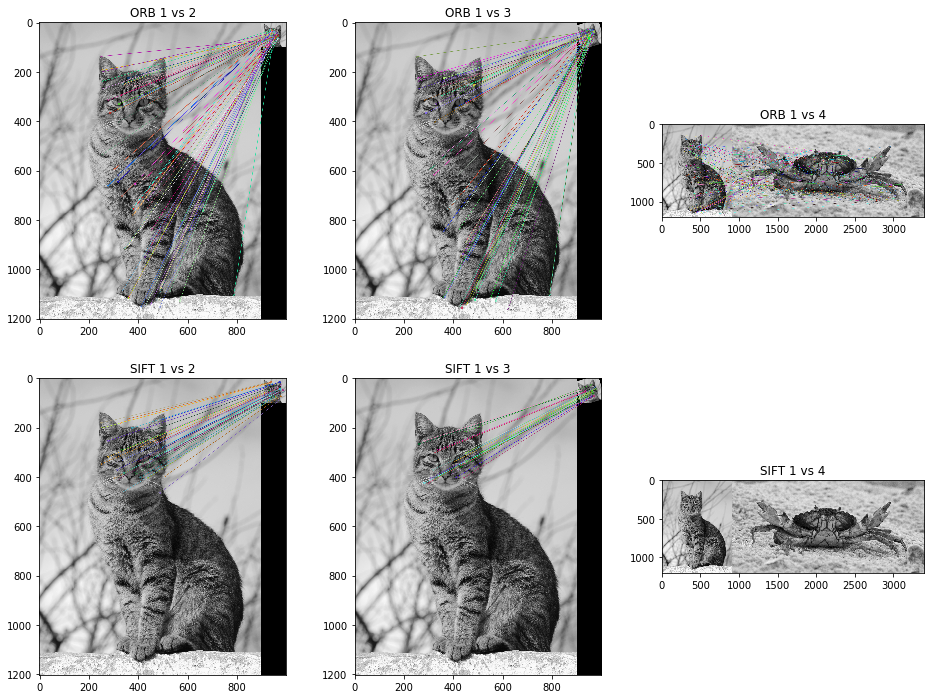

In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import imutils

image1 = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)

image2 = image1[100:500, 200:600]
image2 = cv2.resize(image2, (100, 100))

image3 = cv2.GaussianBlur(image2, (13, 13), 0)
image3 = imutils.rotate(image2, angle=17)

image4 = cv2.imread('crab.jpg', cv2.IMREAD_GRAYSCALE)

def orb_test(image1, image2):
    orb = cv2.ORB_create()
    image1_keypoints, image1_descriptors = orb.detectAndCompute(image1, None)
    image2_keypoints, image2_descriptors = orb.detectAndCompute(image2, None)

    matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = matcher.match(image1_descriptors, image2_descriptors)
    matches = sorted(matches, key=lambda x: x.distance)

    print(f'Matches: {len(matches)}')

    result_image = cv2.drawMatches(
        image1, image1_keypoints, 
        image2, image2_keypoints, 
        matches, #[:100], 
        None, 
        flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    return result_image

def sift_test(image1, image2):
    import cv2.xfeatures2d

    sift = cv2.xfeatures2d.SIFT_create()

    image1_keypoints, image1_descriptors = sift.detectAndCompute(image1, None)
    image2_keypoints, image2_descriptors = sift.detectAndCompute(image2, None)

    matcher = cv2.BFMatcher()
    matches = matcher.knnMatch(image1_descriptors, image2_descriptors, k=2)

    good_matches = [
        [m] 
        for m, n in matches 
        if m.distance < 0.3 * n.distance
    ]

    print(f'Matches: {len(matches)}, good_matches: {len(good_matches)}')

    result_image = cv2.drawMatchesKnn(
        image1, image1_keypoints, 
        image2, image2_keypoints, 
        good_matches,
        None, 
        flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    return result_image

plt.figure(figsize=(16, 12))

plt.subplot(2, 3, 1)
plt.title('ORB 1 vs 2')
plt.imshow(orb_test(image1, image2))

plt.subplot(2, 3, 2)
plt.title('ORB 1 vs 3')
plt.imshow(orb_test(image1, image3))

plt.subplot(2, 3, 3)
plt.title('ORB 1 vs 4')
plt.imshow(orb_test(image1, image4))

plt.subplot(2, 3, 4)
plt.title('SIFT 1 vs 2')
plt.imshow(sift_test(image1, image2))

plt.subplot(2, 3, 5)
plt.title('SIFT 1 vs 3')
plt.imshow(sift_test(image1, image3))

plt.subplot(2, 3, 6)
plt.title('SIFT 1 vs 4')
plt.imshow(sift_test(image1, image4))